# Центральная предельная теорема своими руками

Цель: научится использовать ЦПТ для оценки и аппроксимации непрерывного распределения. Научиться использовать функционал модуля Scipy.stats для создания различных видов распределения, строить функции плотности и гистограммы.

В качестве распределения для этого задания рассмотрим Гамма-распределение. Плотность вероятности данного распределения имеет вид:
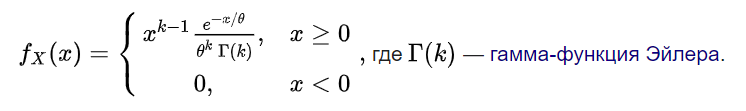

Где $\theta$ и $a$ это параметры гамма распредения. Давайте возьмем и зафиксируем эти параметры равным 2-м. Стоит отметить, что если $a$ это целое число, то такое распределение также называют распределением Эрланга.

Информацию о гамма распределении можно найти [тут](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

In [98]:
# параметры нашего распределения
a = 2.0
thetta = 2.0

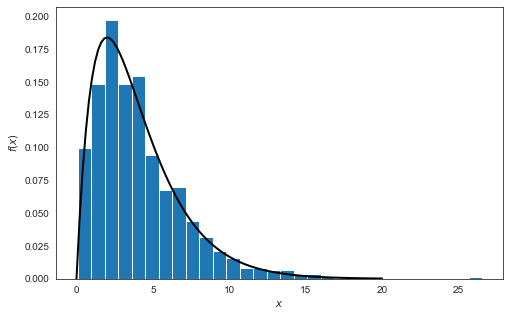

In [101]:
# импортируем нужные библиотеки
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
fig, ax = plt.subplots(1, 1, figsize = (8,5))
# создадим выборку из 1000 элементов. Пусть теперь наша выборка является генеральной совокупностью.
# нарисуем график
rv = gamma(a, scale = thetta)
x = np.linspace(0,20,100)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf');
model = gamma.rvs(a, scale = thetta, size=1000)
ax.hist(model, bins = 30, density = True);
ax.set_xlabel('$x$');
ax.set_ylabel('$f(x)$');

Теперь применим центрально предельную теорему. Будем рассматривать нашу сгенерированную выборку из 1000 величин как генеральную совокупность. Теперь давайте посмотрим как ЦПТ работает при раличных объемах выборок. Для примера рассмотрим n = 3,5,30,50. Будем генерировать выборки по n тысячу раз. Будем считать среднее значение для каждой выборки из нашей генеральной совокупности. Используя формулы из теории вероятности для гамма распределения найдем мат. ожидание и дисперсию. Аппроксимируем с полученными значениями каждую выборку нормальным распределением.

$M(x)$ = $a$*$\theta$

$D(x)$ = $a$*$\theta^{2}$

<Figure size 2160x2160 with 0 Axes>

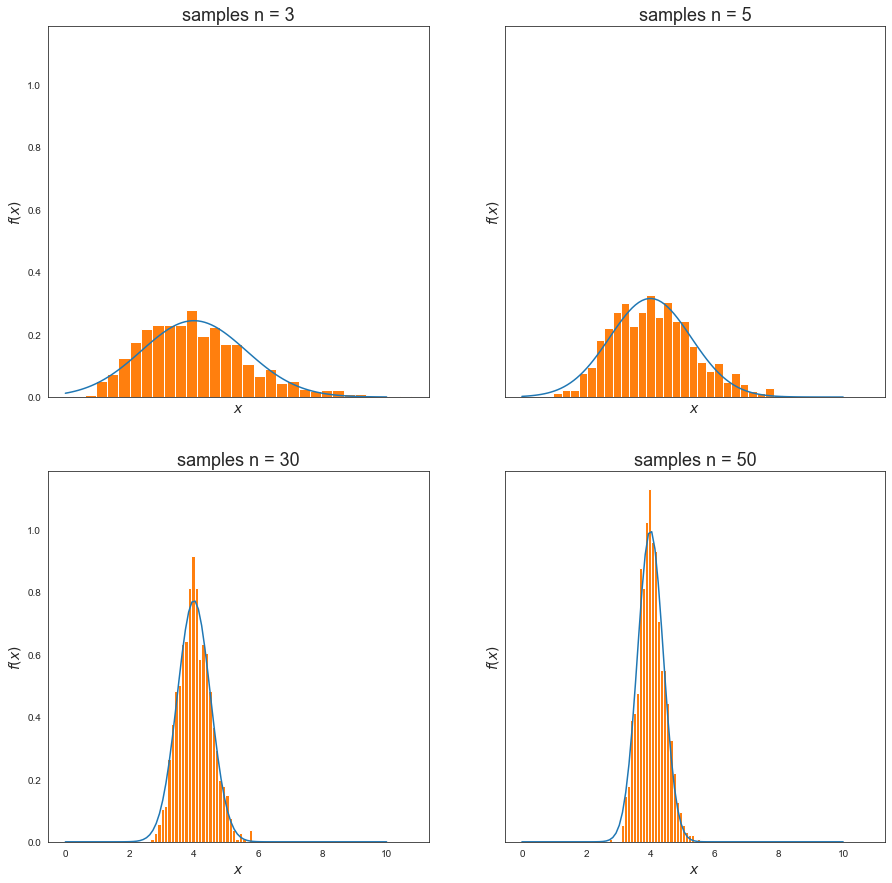

In [100]:
from scipy.stats import norm
x = np.linspace(0,10,100)
# посчитаем мат. ожидание и дисперсию
M = a*2 
D = a*4
# зададим размеры полотна
plt.figure(figsize = (30,30))
# будем делать крафик размеро 2*2. 
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize = (15,15))
# вспомогательный датафрейм для визуализации гистограммы выборок
helping_df = pd.DataFrame()
# для каждого n проведем выборку на 1000 элементов. То есть всего будет сгенерировано n*1000 событий 
# из нашей генеральной совокупности
for n, ax in (3, ax1), (5, ax2), (30, ax3), (50, ax4):
    samples = []
    for i in range(1000):
        # возьмем из ген.совокупности n событий 1000 раз. Высчитаем выборочное среднее.
        samples.append(np.mean(np.random.choice(model,n)))
    df[f'sample_{n}'] = samples
    # аппроксимируем на основе ЦПТ распределением с мат.ожиданием = M и дисперсией равной D/n
    norm_ = norm.pdf(x, loc = M, scale = np.sqrt(D/n))
    ax.plot(x, norm_)
    ax.hist(df[f'sample_{n}'], bins = 30, density = True)
    ax.set_title(f'samples n = {n}', fontsize = 18)
    ax.set_xlabel('$x$', fontsize = 14)
    ax.set_ylabel('$f(x)$', fontsize = 14)

___
На основе Гамма распределения мы посмотрели как центрально предельная теорема работает для непрерывного распределения. Мы увидели, что действительно с хорошей степенью точности можно аппроксимировать нормальным распределением какое-то распределение из генеральной совокупности. Чем выше n и чем больше количество выборок (в нашем случае 1000) тем более точно работает ЦПТ. 

На основе этого, мы можем, при достаточно большом n (хотябы 30), аппроксимировать произвольные распределения величин, получающиеся в ходе работы при анализе данных, и имея, лишь выборочные значения судить и строить предположения о всей генерально совокупности в целом.